<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/AI_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [75]:
import pandas as pd

df = pd.read_csv('./dataset.csv', encoding='cp949')

df.head(36)

,passenger,flight,cargo,CPI,GDP,unemployment rate,employer
0,8283164,44219,711295,35.441,9736851.99,2.58,17560000
1,9626415,53442,776759,38.480,10593739.11,2.46,18090000
2,10270666,59927,787342,42.071,11619951.95,2.45,18650000
3,11257011,66363,837215,44.685,12212662.62,2.53,19010000
4,11651345,68615,950574,46.831,12920665.38,2.90,19240000
5,13075979,77332,1112841,49.765,13976896.85,2.48,19850000
6,14602751,89880,1290749,51.995,15167330.55,2.07,20410000
7,15992455,99727,1430974,54.555,16208965.86,2.06,20850000
8,16598273,105267,1631074,56.977,17048532.45,2.62,21210000
9,14104367,90801,1470751,61.258,16057700.45,6.95,19940000


- passenger : 여객 수(명)
- flight number : 운항(편)
- cargo : 화물(톤)
- CPI : 소비자 물가
- GDP : 국내 총 생산
- unemployment rate : 실업률
- employer : 고용자 수

In [76]:
# 데이터 개수
df.shape

(34, 7)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   passenger          34 non-null     int64  
 1   flight             34 non-null     int64  
 2   cargo              34 non-null     int64  
 3   CPI                34 non-null     float64
 4   GDP                34 non-null     float64
 5   unemployment rate  34 non-null     float64
 6   employer           34 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.0 KB


In [78]:
# 상관계수 출력
df.corr()

,passenger,flight,cargo,CPI,GDP,unemployment rate,employer
passenger,1.000000,0.981087,0.796017,0.666782,0.670308,0.112200,0.676798
flight,0.981087,1.000000,0.886719,0.787323,0.792159,0.111788,0.795783
cargo,0.796017,0.886719,1.000000,0.964637,0.965745,0.203241,0.956398
CPI,0.666782,0.787323,0.964637,1.000000,0.995105,0.229977,0.988490
GDP,0.670308,0.792159,0.965745,0.995105,1.000000,0.173042,0.995052
unemployment rate,0.112200,0.111788,0.203241,0.229977,0.173042,1.000000,0.126181
employer,0.676798,0.795783,0.956398,0.988490,0.995052,0.126181,1.000000


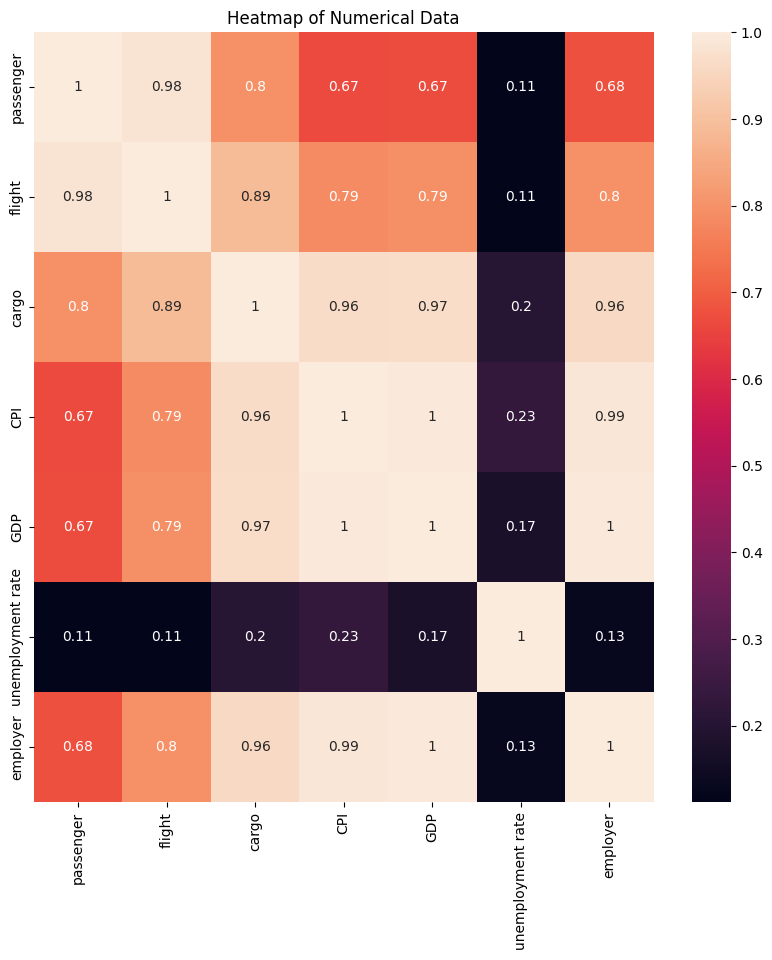

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
# 피처 간 상관 관계 매트릭스
corrMat = df.corr()
fig, ax= plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

In [80]:
# 후진선택방법
# 모든 데이터를 넣고 유의확률 값이 가장 큰 것을 제거하고 다시 하는 과정을 반복해서 모든 유의확률값이 0.05 보다 낮을 떄 끝
import pandas as pd
import statsmodels.api as sm

##후진 소거법
variables = df.columns[1:].tolist()

y = df['passenger']
selected_variables = variables
sl_remove = 0.05

sv_per_step = []
adjusted_r_squared = []
steps = []
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:]
    max_pval = p_vals.max()
    if max_pval >= sl_remove:
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

print(selected_variables)

['flight', 'GDP']


In [81]:
from scipy import stats
import statsmodels.formula.api as smf

formula = 'passenger ~ flight + GDP'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              passenger   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2262.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           2.58e-34
Time:                        10:40:13   Log-Likelihood:                -539.98
No. Observations:                  34   AIC:                             1086.
Df Residuals:                      31   BIC:                             1091.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.126e+06    1.1e+06      7.367      0.0

- R-squared(설명력) : 약 99%
- Prob (F-statistic) : 2.58e-34 (0.05 이하이므로 유의)

In [82]:
X = df[['flight', 'GDP']]
y = df['passenger']

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train.shape, X_test.shape

((27, 2), (7, 2))

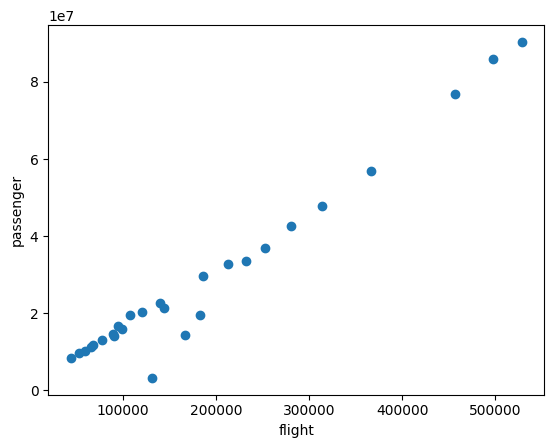

In [85]:
import matplotlib.pyplot as plt

# 운항편, 승객 산점도
plt.scatter(X_train['flight'], y_train)
plt.xlabel('flight')
plt.ylabel('passenger')

plt.show()

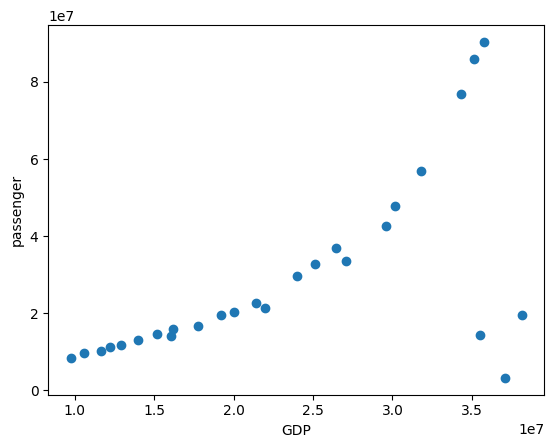

In [86]:
# 층, 거래금액 산점도
plt.scatter(X_train['GDP'], y_train)
plt.xlabel('GDP')
plt.ylabel('passenger')

plt.show()

피처가 두 종류로 적은 편이므로, 다항 회귀를 사용하여 피처 수를 늘린다.

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [88]:
# 피처 증가
poly = PolynomialFeatures(include_bias=False)
poly = poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print('항 구성요소 확인 :', poly.get_feature_names_out())

항 구성요소 확인 : ['flight' 'GDP' 'flight^2' 'flight GDP' 'GDP^2']


In [89]:
# 피처 표준화
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler = scaler.fit(X_train_poly)
X_train_scaled = scaler.transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

RobustScaler : outlier의 영향을 최소화한 기법 / 중앙값과 IQR(interquartile range)을 사용
* IQR = Q3 - Q1, 즉 25퍼센트와 75퍼센트 사이의 값들을 다룬다. (그래서 이상치의 영향이 적은 것)

In [90]:
lr = LinearRegression()
lr = lr.fit(X_train_scaled, y_train)


In [91]:
print('훈련 데이터 정확도 :', lr.score(X_train_scaled, y_train))
print('테스트 데이터 정확도 :', lr.score(X_test_scaled, y_test))

훈련 데이터 정확도 : 0.9973337591819446
테스트 데이터 정확도 : 0.9942272926530846


In [101]:
# 새로운 데이터 예측[flight, GDP]
import numpy as np
new_data = np.array([55000, 40000000.0])
new_data_poly = poly.transform(new_data.reshape(1, -1))
new_data_scaled = scaler.transform(new_data_poly)
prediction = lr.predict(new_data_scaled)
print(prediction)

[-28716901.186089]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
